In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

Matplotlib is building the font cache; this may take a moment.


### Vanila (Simple Gradient Descent) :

[INFO] training...
[INFO] epoch=1, loss=479.9212649
[INFO] epoch=5, loss=11.0790286
[INFO] epoch=10, loss=9.1137831
[INFO] epoch=15, loss=7.0169663
[INFO] epoch=20, loss=6.9984774
[INFO] epoch=25, loss=6.9831634
[INFO] epoch=30, loss=6.1065153
[INFO] epoch=35, loss=4.7627871
[INFO] epoch=40, loss=3.8027815
[INFO] epoch=45, loss=1.9702700
[INFO] epoch=50, loss=1.4613551
[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       250
           1       0.98      1.00      0.99       250

    accuracy                           0.99       500
   macro avg       0.99      0.99      0.99       500
weighted avg       0.99      0.99      0.99       500



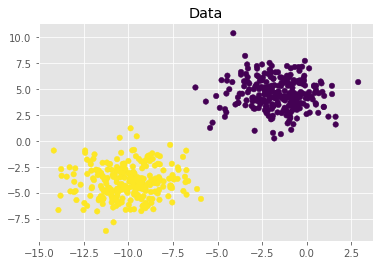

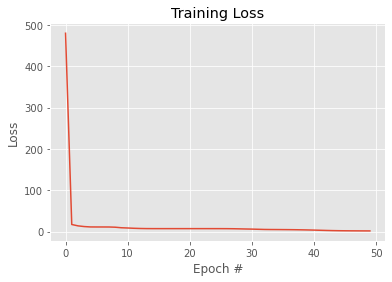

In [10]:
def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0/(1+np.exp(-x))

def predict(x, W):
    # take the dot product between our features and weight matrix
    prediction = sigmoid_activation(x.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    prediction[prediction <= 0.5] = 0
    prediction[prediction > 0.5] = 1
    
    return prediction

epochs = 50
alpha = 0.01

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(x, y) = make_blobs(n_samples = 1000, n_features = 2, centers = 2, cluster_std = 1.5, random_state = 1)

y = y.reshape((y.shape[0], 1))

# insert a column of 1’s as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix

x = np.c_[x, np.ones((x.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(train_x, test_x, train_y, test_y) = train_test_split(x, y, test_size = 0.5, random_state = 42)

print("[INFO] training...")
w = np.random.randn(x.shape[1], 1)
losses = []

for epoch in np.arange(0, epochs):
    # take the dot product between our features ‘X‘ and the weight
    # matrix ‘W‘, then pass this value through our sigmoid activation
    # function, thereby giving us our predictions on the dataset

    preds = sigmoid_activation(train_x.dot(w))
    # now that we have our predictions, we need to determine the
    # ‘error‘, which is the difference between our predictions and
    # the true values
    error = preds - train_y
    loss = np.sum(error**2)
    losses.append(loss)
    gradient = train_x.T.dot(error)
    # in the update stage, all we need to do is "nudge" the weight
    # matrix in the negative direction of the gradient (hence the
    # term "gradient descent" by taking a small step towards a set
    # of "more optimal" parameters

    w+= -alpha*gradient
    
    if epoch == 0 or (epoch+1)%5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch+1), loss))
        
print("[INFO] evaluating...")

preds = predict(test_x, w)
print(classification_report(test_y, preds))

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(test_x[:, 0], test_x[:, 1], marker="o", c=test_y, s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()


Notice how the zero class is classified correctly 100% of the time, but the one class is classified
correctly only 99% of the time. The reason for this discrepancy is because vanilla gradient descent
only performs a weight update once for every epoch – in this example, we trained our model for
100 epochs, so only 100 updates took place. Depending on the initialization of the weight matrix
and the size of the learning rate, it’s possible that we might not be able to learn a model that can
separate the points (even though they are linearly separable)


For simple gradient descent, you are better off training for more epochs with a smaller learning
rate to help overcome this issue. However, as we’ll see in the next section, a variant of gradient
descent called **Stochastic Gradient Descent** performs a weight update for every batch of training
data, implying there are multiple weight updates per epoch. This approach leads to a faster, more
stable convergence.

### Stochastic Gradient Descent

[INFO] training...
[INFO] epoch=1, loss=9.8870192
[INFO] epoch=5, loss=0.0111084
[INFO] epoch=10, loss=0.0053438
[INFO] epoch=15, loss=0.0033277
[INFO] epoch=20, loss=0.0023119
[INFO] epoch=25, loss=0.0017136
[INFO] epoch=30, loss=0.0013268
[INFO] epoch=35, loss=0.0010606
[INFO] epoch=40, loss=0.0008689
[INFO] epoch=45, loss=0.0007258
[INFO] epoch=50, loss=0.0006159
[INFO] evaluating...
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       250
           1       1.00      1.00      1.00       250

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



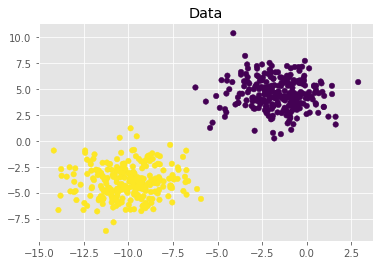

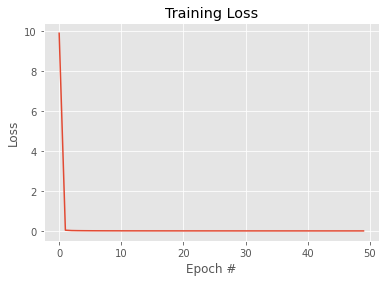

In [13]:
def sigmoid_activation(x):
    # compute the sigmoid activation value for a given input
    return 1.0/(1+np.exp(-x))

def predict(x, W):
    # take the dot product between our features and weight matrix
    prediction = sigmoid_activation(x.dot(W))
    # apply a step function to threshold the outputs to binary
    # class labels
    prediction[prediction <= 0.5] = 0
    prediction[prediction > 0.5] = 1
    
    return prediction

def next_batch(x, y, batchSize):
    # loop over our dataset ‘X‘ in mini-batches, yielding a tuple of
    # the current batched data and labels

    for i in np.arange(0, x.shape[0], batchSize):
        yield (x[i:i + batchSize], y[i:i + batchSize])

epochs = 50
alpha = 0.01
batchSize = 32

# generate a 2-class classification problem with 1,000 data points,
# where each data point is a 2D feature vector
(x, y) = make_blobs(n_samples = 1000, n_features = 2, centers = 2, cluster_std = 1.5, random_state = 1)

y = y.reshape((y.shape[0], 1))

# insert a column of 1’s as the last entry in the feature
# matrix -- this little trick allows us to treat the bias
# as a trainable parameter within the weight matrix

x = np.c_[x, np.ones((x.shape[0]))]

# partition the data into training and testing splits using 50% of
# the data for training and the remaining 50% for testing
(train_x, test_x, train_y, test_y) = train_test_split(x, y, test_size = 0.5, random_state = 42)

print("[INFO] training...")
w = np.random.randn(x.shape[1], 1)
losses = []

for epoch in np.arange(0, epochs):
    epochLoss = []
    
    for (batchx, batchy) in next_batch(x, y, batchSize):
        # take the dot product between our features ‘X‘ and the weight
        # matrix ‘W‘, then pass this value through our sigmoid activation
        # function, thereby giving us our predictions on the dataset

        preds = sigmoid_activation(train_x.dot(w))
        # now that we have our predictions, we need to determine the
        # ‘error‘, which is the difference between our predictions and
        # the true values
        error = preds - train_y
        loss = np.sum(error**2)
        epochLoss.append(loss)
        # the gradient descent update is the dot product between our
        # current batch and the error on the batch

        gradient = train_x.T.dot(error)
        # in the update stage, all we need to do is "nudge" the weight
        # matrix in the negative direction of the gradient (hence the
        # term "gradient descent" by taking a small step towards a set
        # of "more optimal" parameters

        w+= -alpha*gradient
        
    # update our loss history by taking the average loss across all
    # batches
    loss = np.average(epochLoss)
    losses.append(loss)

    if epoch == 0 or (epoch+1)%5 == 0:
        print("[INFO] epoch={}, loss={:.7f}".format(int(epoch+1), loss))

print("[INFO] evaluating...")

preds = predict(test_x, w)
print(classification_report(test_y, preds))

# plot the (testing) classification data
plt.style.use("ggplot")
plt.figure()
plt.title("Data")
plt.scatter(test_x[:, 0], test_x[:, 1], marker="o", c=test_y, s=30)

# construct a figure that plots the loss over time
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), losses)
plt.title("Training Loss")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.show()
